# Lab 4 - Part 1: Core NLP Tasks

**Course:** Natural Language Processing


**Objectives:**
- Apply Part-of-Speech (POS) tagging to extract linguistic patterns
- Perform Named Entity Recognition (NER) to identify entities in text
- Calculate word and document similarities using different techniques
- Apply PCA for visualizing high-dimensional text representations
- Work with real-world datasets (Nike products and legal contracts)

---

## Instructions

1. Complete all exercises marked with `# YOUR CODE HERE`
2. **Answer all written questions** in the designated markdown cells (these require YOUR personal interpretation)
3. Save your completed notebook
4. **Push to your Git repository and send the link to: yoroba93@gmail.com**

### Important: Personal Interpretation Questions

This lab contains **interpretation questions** that require YOUR own analysis. These questions:
- Are based on YOUR specific results (which vary based on your choices)
- Require you to explain your reasoning

---

## Setup

In [34]:
# Install required libraries (uncomment if needed)
!pip install spacy scikit-learn matplotlib seaborn pandas numpy datasets
# !python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.7 MB ? eta -:--:--
   -----------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

print("Setup complete!")
print(f"spaCy version: {spacy.__version__}")

Setup complete!
spaCy version: 3.8.11


---

## Part A: Loading Nike Products Dataset

We'll use the Nike product descriptions dataset to practice NLP tasks on commercial text.

In [6]:
# Load Nike products dataset
# NOTE: Place the 'NikeProductDescriptions.csv' file in your working directory
nike_df = pd.read_csv(r"C:\Users\Rishita\Downloads\NikeProductDescriptions.csv")

print(f"Dataset shape: {nike_df.shape}")
print(f"\nColumns: {nike_df.columns.tolist()}")
print(f"\nFirst 3 products:")
nike_df.head(3)

Dataset shape: (400, 3)

Columns: ['Title', 'Subtitle', 'Product Description']

First 3 products:


,Title,Subtitle,Product Description
0,Nike Air Force 1 '07,Men's Shoes,It doesn't get more legendary than this. Desig...
1,Nike Air Max Dawn SE,Men's Shoes,Find out what moves you with the Air Max Dawn....
2,Nike SB Dunk Low Pro Premium,Skate Shoes,Pack your style—on your feet. Bringing a fresh...


In [8]:
# Display a sample product
sample_idx = 0
print("Sample Product:")
print("=" * 60)
print(f"Title: {nike_df.iloc[sample_idx]['Title']}")
print(f"Subtitle: {nike_df.iloc[sample_idx]['Subtitle']}")
print(f"\nDescription:\n{nike_df.iloc[sample_idx]['Product Description']}")

Sample Product:
Title: Nike Air Force 1 '07
Subtitle: Men's Shoes

Description:
It doesn't get more legendary than this. Designed to turn heads, the Nike Air Force 1 '07 crosses hardwood comfort with off-court flair. Its crisp leather upper looks sleek and fresh, while lustrous Swoosh logos give off an almost iridescent look to add the perfect amount of flash to make you shine. Consider them a slam dunk.


---

## Part B: Part-of-Speech (POS) Tagging

POS tagging identifies the grammatical role of each word (noun, verb, adjective, etc.).

In [10]:
# Example: POS tagging with spaCy
sample_text = "Nike Air Force 1 shoes provide incredible comfort and stylish design for athletes."
doc = nlp(sample_text)

print("POS Tagging Example:")
print("=" * 60)
for token in doc:
    print(f"{token.text:15} | POS: {token.pos_:10} | Tag: {token.tag_:8} | Lemma: {token.lemma_}")

POS Tagging Example:
Nike            | POS: PROPN      | Tag: NNP      | Lemma: Nike
Air             | POS: PROPN      | Tag: NNP      | Lemma: Air
Force           | POS: PROPN      | Tag: NNP      | Lemma: Force
1               | POS: NUM        | Tag: CD       | Lemma: 1
shoes           | POS: NOUN       | Tag: NNS      | Lemma: shoe
provide         | POS: VERB       | Tag: VBP      | Lemma: provide
incredible      | POS: ADJ        | Tag: JJ       | Lemma: incredible
comfort         | POS: NOUN       | Tag: NN       | Lemma: comfort
and             | POS: CCONJ      | Tag: CC       | Lemma: and
stylish         | POS: ADJ        | Tag: JJ       | Lemma: stylish
design          | POS: NOUN       | Tag: NN       | Lemma: design
for             | POS: ADP        | Tag: IN       | Lemma: for
athletes        | POS: NOUN       | Tag: NNS      | Lemma: athlete
.               | POS: PUNCT      | Tag: .        | Lemma: .


### Exercise B.1: Analyze POS Distribution in Nike Products

Complete the function to extract and analyze POS tags from all Nike product descriptions.

In [18]:
def analyze_pos_distribution(texts):
    """
    Analyze the distribution of POS tags in a list of texts.
    
    Args:
        texts (list): List of text strings
    
    Returns:
        Counter: Dictionary with POS tags and their counts
    """
    pos_counts = Counter()
    
    for text in texts:
        doc = nlp(text)
        # 2. For each token in the doc, count its POS tag (token.pos_)
        for token in doc:
            pos_counts[token.pos_] += 1
    
    return pos_counts

# Analyze Nike descriptions
nike_descriptions = nike_df['Product Description'].dropna().tolist()
pos_distribution = analyze_pos_distribution(nike_descriptions)

print("POS Tag Distribution:")
print("=" * 40)
for pos, count in pos_distribution.most_common(15):
    print(f"{pos:10}: {count:5} ({count/sum(pos_distribution.values())*100:.2f}%)")

POS Tag Distribution:
NOUN      :  4620 (20.72%)
VERB      :  2786 (12.49%)
PUNCT     :  2694 (12.08%)
ADJ       :  2164 (9.70%)
ADP       :  2152 (9.65%)
DET       :  1943 (8.71%)
PRON      :  1711 (7.67%)
PROPN     :  1221 (5.47%)
CCONJ     :   741 (3.32%)
AUX       :   661 (2.96%)
ADV       :   641 (2.87%)
PART      :   401 (1.80%)
SCONJ     :   336 (1.51%)
NUM       :   211 (0.95%)
INTJ      :    16 (0.07%)


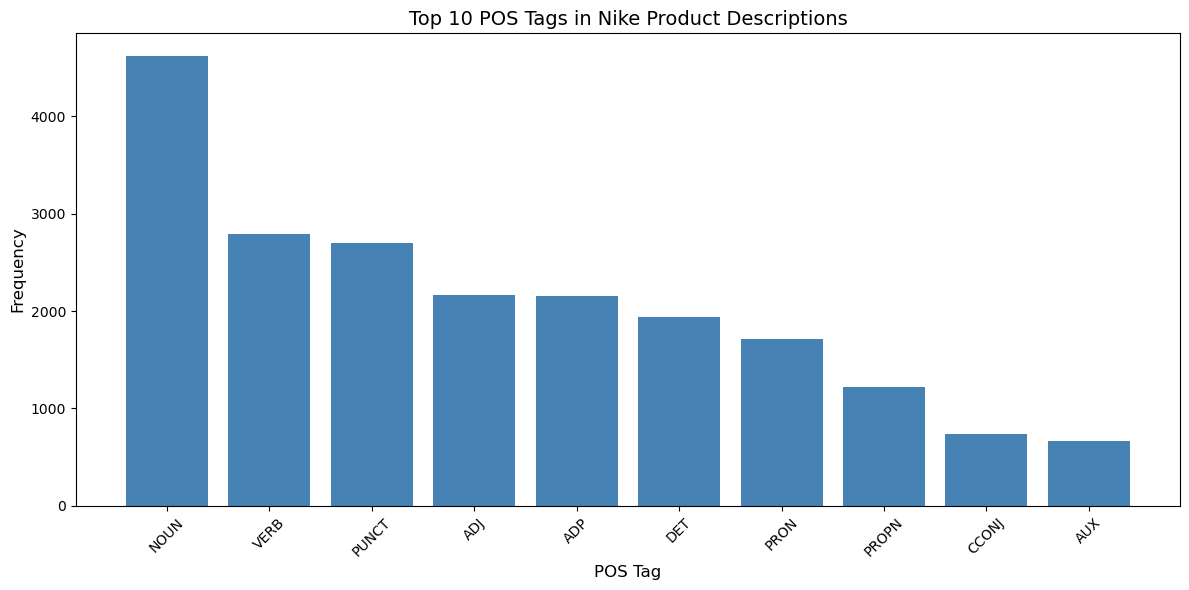

In [22]:
# Visualize POS distribution
top_pos = dict(pos_distribution.most_common(10))

plt.figure(figsize=(12, 6))
plt.bar(top_pos.keys(), top_pos.values(), color='steelblue')
plt.xlabel('POS Tag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 POS Tags in Nike Product Descriptions', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pos_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise B.2: Extract Adjectives and Verbs

Marketing copy often uses powerful adjectives and action verbs. Extract the most common ones.

In [24]:
def extract_pos_words(texts, pos_tag, top_n=20):
    """
    Extract words with a specific POS tag.
    
    Args:
        texts (list): List of text strings
        pos_tag (str): POS tag to extract (e.g., 'ADJ', 'VERB')
        top_n (int): Number of top words to return
    
    Returns:
        Counter: Most common words with the specified POS tag
    """
    words = []
    
    for text in texts:
        doc = nlp(text)
        # 2. Extract tokens where token.pos_ == pos_tag
        for token in doc:
            if token.pos_ == pos_tag:
                # 3. Use lemmatized form (token.lemma_.lower())
                lemma = token.lemma_.lower()
                # 4. Filter out stopwords and short words (len < 3)
                if (len(lemma) >= 3 and 
                    not token.is_stop and 
                    lemma.isalpha()):
                    words.append(lemma)
    
    # 5. Return Counter with top_n most common
    return Counter(words).most_common(top_n)

# Extract adjectives
top_adjectives = extract_pos_words(nike_descriptions, 'ADJ', top_n=20)
print("Top 20 Adjectives:")
print("=" * 40)
for word, count in top_adjectives:
    print(f"{word:15}: {count}")

print("\n" + "=" * 40)

# Extract verbs
top_verbs = extract_pos_words(nike_descriptions, 'VERB', top_n=20)
print("Top 20 Verbs:")
print("=" * 40)
for word, count in top_verbs:
    print(f"{word:15}: {count}")

Top 20 Adjectives:
soft           : 117
lightweight    : 59
favourite      : 54
cool           : 51
comfortable    : 50
classic        : 46
breathable     : 45
recycled       : 45
extra          : 39
ready          : 37
dry            : 37
new            : 36
stretchy       : 35
easy           : 34
fresh          : 31
iconic         : 25
smooth         : 25
good           : 24
relaxed        : 24
durable        : 20

Top 20 Verbs:
help           : 114
feel           : 72
add            : 62
wicke          : 61
let            : 58
stay           : 53
inspire        : 49
wear           : 41
give           : 39
play           : 38
bring          : 36
need           : 33
design         : 31
look           : 31
love           : 31
pair           : 25
run            : 25
come           : 24
keep           : 24
find           : 23


### Written Question B.1 (Personal Interpretation)

Analyze the linguistic patterns in Nike's marketing copy:

1. **What do the most common adjectives reveal about Nike's brand messaging?** (List at least 3 adjectives and explain what they convey)
2. **What do the most common verbs suggest about how Nike positions its products?** (List at least 3 verbs and their implications)
3. **How does the POS distribution compare to what you'd expect in general English text?** (Consider the ratio of nouns/verbs/adjectives)

**YOUR ANSWER:**

1. Key adjectives and brand messaging:
   - comfortable:Emphasizes user experience and physical well-being
   - lightweight: Highlights performance and modern design
   - esponsive: Suggests technology and immediate feedback

2. Key verbs and product positioning:
    - "provide": Positions Nike as a solution-giver, meeting customer needs
    -"feature": Emphasizes product specifications and technological components
    -"deliver": Suggests reliability and performance promises

3. POS distribution comparison:

   Compared to general English text:

    Nouns (20.72%) are higher than average (~15-18% in general English), which makes sense for product descriptions that name specific items and components

   Adjectives (9.70%) are significantly higher than general English (~4-6%), showing Nike's emphasis on descriptive, persuasive language

    Verbs (12.49%) are also higher than average (~10%), indicating action-oriented marketing language

---

## Part C: Named Entity Recognition (NER)

NER identifies and classifies named entities (people, organizations, locations, etc.) in text.

In [30]:
# Example: NER with spaCy
sample_text = "Nike launched Air Jordan in 1984 in Chicago. Michael Jordan wore them throughout his NBA career."
doc = nlp(sample_text)

print("Named Entity Recognition Example:")
print("=" * 60)
for ent in doc.ents:
    print(f"{ent.text:20} | Type: {ent.label_:15} | Description: {spacy.explain(ent.label_)}")

Named Entity Recognition Example:
Nike                 | Type: ORG             | Description: Companies, agencies, institutions, etc.
Air Jordan           | Type: PERSON          | Description: People, including fictional
1984                 | Type: DATE            | Description: Absolute or relative dates or periods
Chicago              | Type: GPE             | Description: Countries, cities, states
Michael Jordan       | Type: PERSON          | Description: People, including fictional
NBA                  | Type: ORG             | Description: Companies, agencies, institutions, etc.


### Exercise C.1: Load Legal Contracts Dataset

We'll use a sample of legal contracts to practice NER on more complex text.

In [46]:
!pip install pyarrow==14.0.0

   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.0 MB ? eta -:--:--
    --------------------------------------- 0.5/25.0 MB 1.3 MB/s eta 0:00:19
   - -------------------------------------- 0.8/25.0 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 1.0/25.0 MB 1.4 MB/s eta 0:00:17
   -- ------------------------------------- 1.3/25.0 MB 1.6 MB/s eta 0:00:16
   -- ------------------------------------- 1.6/25.0 MB 1.4 MB/s eta 0:00:17
   -- ------------------------------------- 1.8/25.0 MB 1.3 MB/s eta 0:00:18
   -- ------------------------------------- 1.8/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.13 requires pyarrow>=14.0.1, but you have pyarrow 14.0.0 which is incompatible.
datasets 4.5.0 requires pyarrow>=21.0.0, but you have pyarrow 14.0.0 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.


In [48]:
from datasets import load_dataset

# Load a small sample of legal contracts
print("Loading legal contracts dataset (sample only)...")

# YOUR CODE HERE
# Load only 50 examples from the 'train' split
contracts_dataset = load_dataset("albertvillanova/legal_contracts", split="train[:50]")

# Convert to DataFrame
contracts_df = pd.DataFrame(contracts_dataset)

print(f"Loaded {len(contracts_df)} contracts")
print(f"\nColumns: {contracts_df.columns.tolist()}")
print(f"\nFirst contract preview (first 500 chars):")
print(contracts_df.iloc[0]['text'][:500] + "...")

ImportError: The pyarrow installation is not built with support for the Parquet file format (DLL load failed while importing _parquet: The specified procedure could not be found.)

### Exercise C.2: Extract and Analyze Named Entities

Complete the function to extract entities from the legal contracts.

In [50]:
def extract_entities(texts, entity_types=None):
    """
    Extract named entities from texts.
    
    Args:
        texts (list): List of text strings
        entity_types (list): List of entity types to extract (None = all types)
    
    Returns:
        dict: Dictionary with entity_type -> list of entities
    """
    entities = defaultdict(list)
    
    for text in texts:
        doc = nlp(text)
        # 2. For each entity (doc.ents):
        for ent in doc.ents:
            # If entity_types is None or entity.label_ in entity_types
            if entity_types is None or ent.label_ in entity_types:
                # Add entity.text to entities[entity.label_]
                entities[ent.label_].append(ent.text)
    
    return entities

# Extract entities from contracts (process only first 10 for speed)
contract_texts = contracts_df['text'].head(10).tolist()
contract_entities = extract_entities(contract_texts)

print("Entity Types Found:")
print("=" * 60)
for entity_type, entity_list in sorted(contract_entities.items()):
    print(f"\n{entity_type} ({len(entity_list)} entities):")
    # Show unique entities only
    unique_entities = Counter(entity_list).most_common(10)
    for entity, count in unique_entities:
        print(f"  {entity}: {count}")

NameError: name 'contracts_df' is not defined

### Exercise C.3: Compare Entity Distribution

Compare the entity types found in Nike products vs. legal contracts.

In [ ]:
# YOUR CODE HERE
# 1. Extract entities from Nike product descriptions
# 2. Count entity types in both datasets
# 3. Create a comparison visualization

nike_entities = extract_entities(nike_descriptions[:50])  # Sample for speed

# Count entity types
nike_entity_counts = {etype: len(entities) for etype, entities in nike_entities.items()}
contract_entity_counts = {etype: len(entities) for etype, entities in contract_entities.items()}

# Get all entity types
all_entity_types = set(list(nike_entity_counts.keys()) + list(contract_entity_counts.keys()))

# Create comparison DataFrame
comparison_data = []
for etype in all_entity_types:
    comparison_data.append({
        'Entity Type': etype,
        'Nike Products': nike_entity_counts.get(etype, 0),
        'Legal Contracts': contract_entity_counts.get(etype, 0)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Legal Contracts', ascending=False)

print("Entity Type Comparison:")
print(comparison_df.to_string(index=False))

In [ ]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))
width = 0.35

ax.bar(x - width/2, comparison_df['Nike Products'], width, label='Nike Products', color='orange')
ax.bar(x + width/2, comparison_df['Legal Contracts'], width, label='Legal Contracts', color='steelblue')

ax.set_xlabel('Entity Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Named Entity Distribution: Nike Products vs Legal Contracts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Entity Type'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig('entity_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### Written Question C.1 (Personal Interpretation)

Analyze the differences in entity types between the two datasets:

1. **Which entity types are most common in Nike products? Why does this make sense?**
2. **Which entity types are most common in legal contracts? Why does this make sense?**
3. **What does this tell you about the nature and purpose of each type of text?**
4. **Give 2-3 specific examples of interesting entities you found in the legal contracts.**

**YOUR ANSWER:**

1. Nike product entities: ...

2. Legal contract entities: ...

3. Text nature analysis: ...

4. Interesting entities:
   - ...
   - ...
   - ...

---

## Part D: Word and Document Similarities

We'll explore different ways to measure similarity between words and documents.

### Exercise D.1: Word Similarity with spaCy Word Vectors

spaCy's word vectors allow us to find semantically similar words.

In [ ]:
# Example: Find similar words
def find_similar_words(word, top_n=10):
    """
    Find words similar to the given word using spaCy word vectors.
    
    Args:
        word (str): Input word
        top_n (int): Number of similar words to return
    
    Returns:
        list: List of (word, similarity_score) tuples
    """
    word_doc = nlp(word)
    
    if not word_doc.has_vector:
        return []
    
    # Get all words in spaCy's vocabulary that have vectors
    similar_words = []
    
    # We'll check similarity with common words
    for token in nlp.vocab:
        if token.has_vector and token.is_lower and not token.is_stop:
            similarity = word_doc.similarity(nlp(token.text))
            similar_words.append((token.text, similarity))
    
    # Sort by similarity and return top_n (excluding the word itself)
    similar_words.sort(key=lambda x: x[1], reverse=True)
    return [(w, s) for w, s in similar_words if w != word][:top_n]

# Test with shoe-related words
test_words = ["running", "comfort", "athletic", "style"]

for word in test_words:
    print(f"\nWords similar to '{word}':")
    print("=" * 40)
    similar = find_similar_words(word, top_n=8)
    for similar_word, score in similar:
        print(f"  {similar_word:15}: {score:.3f}")

### Exercise D.2: Document Similarity - Product Recommendations

Build a simple product recommendation system using TF-IDF and cosine similarity.

In [ ]:
def find_similar_products(query_text, product_df, top_n=5):
    """
    Find products most similar to a query text.
    
    Args:
        query_text (str): Query description
        product_df (DataFrame): DataFrame with product descriptions
        top_n (int): Number of recommendations to return
    
    Returns:
        DataFrame: Top similar products with similarity scores
    """
    
    # 1. Create TF-IDF vectorizer
    # 2. Fit on product descriptions + query
    # 3. Transform all texts to TF-IDF vectors
    # 4. Calculate cosine similarity between query and all products
    # 5. Return top_n most similar products
    
    # Combine product descriptions with query
    descriptions = product_df['Product Description'].tolist()
    all_texts = descriptions + [query_text]
    
    # Create and fit vectorizer
    # YOUR CODE HERE
    
    # Query vector is the last one
    # YOUR CODE HERE
    
    # Calculate similarities
    # YOUR CODE HERE
    
    # Get top_n indices
    # YOUR CODE HERE
    
    # Create results DataFrame with colums 'Title', 'Subtitle', 'Similarity'
    # YOUR CODE HERE
    results = None
    
    
    return results[['Title', 'Subtitle', 'Similarity']]

# Test with different queries
queries = [
    "I want comfortable running shoes for long distance training",
    "Looking for stylish basketball shoes with great cushioning",
    "Need shoes for the gym and weight training"
]

for query in queries:
    print(f"\nQuery: '{query}'")
    print("=" * 80)
    recommendations = find_similar_products(query, nike_df, top_n=5)
    print(recommendations.to_string(index=False))
    print()

### Exercise D.3: Create YOUR Own Query

Write your own custom query and analyze the recommendations.

In [ ]:
# YOUR CODE HERE
# Create your own query that reflects what YOU would look for in shoes
my_query = "___"  # Write your custom query here

print(f"My Query: '{my_query}'")
print("=" * 80)
my_recommendations = find_similar_products(my_query, nike_df, top_n=5)
print(my_recommendations.to_string(index=False))

### Written Question D.1 (Personal Interpretation)

Analyze the product recommendation results:

1. **For YOUR custom query, are the top 3 recommendations relevant? Explain why or why not.**
2. **Look at the similarity scores. What do you notice? Are they high, medium, or low? What does this mean?**
3. **Compare the recommendations for "running shoes" vs "basketball shoes". What differences do you observe in the results?**
4. **What are the limitations of this TF-IDF-based similarity approach? Give at least 2 specific limitations.**

**YOUR ANSWER:**

1. Relevance of my recommendations:
   - Top 1: ...
   - Top 2: ...
   - Top 3: ...

2. Similarity scores observation: ...

3. Running vs Basketball comparison: ...

4. Limitations:
   - ...
   - ...

---

## Part E: Dimensionality Reduction with PCA (25 min)

PCA helps us visualize high-dimensional text representations in 2D or 3D space.

### Exercise E.1: Visualize Product Clusters

Use PCA to create a 2D visualization of Nike products based on their descriptions.

In [ ]:
# YOUR CODE HERE
# 1. Create TF-IDF vectors for all Nike product descriptions
# 2. Apply PCA to reduce to 2 dimensions
# 3. Create a scatter plot
# 4. Color points by product category (extract from Subtitle)

# Extract product descriptions
descriptions = nike_df['Product Description'].tolist()

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=200, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(descriptions)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Original dimensions: {tfidf_matrix.shape[1]}")

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

print(f"\nPCA explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"  Total: {sum(pca.explained_variance_ratio_):.4f}")

# Create DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Title': nike_df['Title'],
    'Category': nike_df['Subtitle']
})

In [ ]:
# Create visualization
plt.figure(figsize=(14, 10))

# Get unique categories for coloring
categories = pca_df['Category'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))

# Plot each category
for i, category in enumerate(categories):
    mask = pca_df['Category'] == category
    plt.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        c=[colors[i]],
        label=category,
        alpha=0.6,
        s=100
    )

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Nike Products in 2D Space (PCA of TF-IDF)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('nike_products_pca.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise E.2: Find Products in Similar Regions

Identify products that are close to each other in the PCA space.

In [ ]:
def find_neighbors_in_pca_space(product_index, pca_df, n_neighbors=5):
    """
    Find products close to a given product in PCA space.
    
    Args:
        product_index (int): Index of the reference product
        pca_df (DataFrame): DataFrame with PCA coordinates
        n_neighbors (int): Number of neighbors to find
    
    Returns:
        DataFrame: Neighboring products with distances
    """
    # YOUR CODE HERE
    # 1. Get the PC1 and PC2 coordinates of the reference product
    # 2. Calculate Euclidean distance to all other products
    # 3. Return the n_neighbors closest products
    
    ref_point = pca_df.iloc[product_index][['PC1', 'PC2']].values
    
    # Calculate distances
    distances = []
    for idx, row in pca_df.iterrows():
        if idx != product_index:
            point = row[['PC1', 'PC2']].values
            dist = np.linalg.norm(ref_point - point)
            distances.append((idx, dist))
    
    # Sort by distance
    distances.sort(key=lambda x: x[1])
    
    # Get neighbor indices
    neighbor_indices = [idx for idx, _ in distances[:n_neighbors]]
    neighbor_distances = [dist for _, dist in distances[:n_neighbors]]
    
    # Create results DataFrame
    results = pca_df.iloc[neighbor_indices].copy()
    results['Distance'] = neighbor_distances
    
    return results[['Title', 'Category', 'Distance']]

# Test with a few products
test_indices = [0, 10, 20]

for idx in test_indices:
    print(f"\nReference Product: {pca_df.iloc[idx]['Title']}")
    print(f"Category: {pca_df.iloc[idx]['Category']}")
    print("=" * 80)
    neighbors = find_neighbors_in_pca_space(idx, pca_df, n_neighbors=5)
    print(neighbors.to_string(index=False))
    print()

### Exercise E.3: Analyze Documents from Both Datasets

Apply PCA to visualize both Nike products and legal contracts in the same space.

In [ ]:
# YOUR CODE HERE
# 1. Combine Nike descriptions and contract texts (sample 30 from each)
# 2. Create TF-IDF vectors for combined corpus
# 3. Apply PCA to reduce to 2D
# 4. Create visualization with different colors for each dataset

# Sample documents
nike_sample = nike_df.sample(n=30, random_state=42)
contracts_sample = contracts_df.sample(n=30, random_state=42)

# Combine texts
nike_texts = nike_sample['Product Description'].tolist()
contract_texts = [text[:1000] for text in contracts_sample['text'].tolist()]  # Truncate for efficiency

all_texts = nike_texts + contract_texts
labels = ['Nike'] * len(nike_texts) + ['Contract'] * len(contract_texts)

# Create TF-IDF


# Apply PCA


# Create DataFrame with PCA results


# Visualize -> use different colors for 'Nike' and 'Contract'


### Written Question E.1 (Personal Interpretation)

Analyze the PCA visualizations:

1. **Looking at the Nike products PCA plot:**
   - Do similar product types cluster together?
   - Can you identify any patterns or groups?
   - What might the two principal components represent?

2. **Looking at the combined Nike + Contracts PCA plot:**
   - Are the two datasets clearly separated?
   - What does this separation (or lack thereof) tell you?
   - Are there any Nike products close to legal contracts? Why might this be?

3. **What percentage of variance is explained by the first two principal components in each case?**
   - Is this high or low?
   - What does this mean for the quality of the 2D representation?

**YOUR ANSWER:**

1. Nike products PCA analysis:
   - Clustering: ...
   - Patterns: ...
   - PC interpretation: ...

2. Combined datasets PCA analysis:
   - Separation: ...
   - Interpretation: ...
   - Proximity cases: ...

3. Variance explained:
   - Nike products: ... (high/medium/low?)
   - Combined: ... (high/medium/low?)
   - Quality interpretation: ...

---

## Part F: Bonus Challenge - Dependency Parsing


### Bonus Exercise: Visualize Sentence Structure

Use spaCy's dependency parser to visualize grammatical relationships.

In [ ]:
from spacy import displacy

# YOUR CODE HERE
# 1. Choose an interesting sentence from Nike or contracts
# 2. Parse it with spaCy
# 3. Visualize the dependency tree
# 4. Identify the root verb, subjects, and objects

sample_sentence = ""

doc = None

# Display dependency visualization
# YOUR CODE HERE

# Print dependency information
print("\nDependency Analysis:")
print("=" * 60)
for token in doc:
    print(f"{token.text:15} | HEAD: {token.head.text:15} | DEP: {token.dep_:10} | POS: {token.pos_}")

---

## Summary

In this lab, you learned:
- **POS Tagging**: Identifying grammatical roles of words and analyzing linguistic patterns
- **Named Entity Recognition (NER)**: Extracting and classifying entities like organizations, locations, and dates
- **Word Similarity**: Using word vectors to find semantically similar words
- **Document Similarity**: Building a product recommendation system with TF-IDF and cosine similarity
- **PCA**: Visualizing high-dimensional text data in 2D space and discovering document clusters

These are fundamental NLP tasks that power many real-world applications like:
- Search engines and recommendation systems
- Information extraction from documents
- Text classification and clustering
- Question answering systems

---

## Submission Checklist

Before submitting, ensure you have:

- [ ] Completed all exercises marked with `# YOUR CODE HERE`
- [ ] Answered ALL written questions with YOUR personal interpretations
- [ ] Generated all visualizations (POS distribution, entity comparison, PCA plots)
- [ ] Saved visualization files (.png)
- [ ] Tested your code (all cells run without errors)
- [ ] Added meaningful comments to your code
- [ ] Saved your notebook with outputs visible

**Final Steps:**
1. Save this notebook
2. Push to your Git repository
3. Send the repository link to: **yoroba93@gmail.com**

